<a href="https://colab.research.google.com/github/ThodupunooriSaiManish/Machine_Learning/blob/main/ML_Assignment2_205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML

pdf_id = "1gWZGfJdw5xptfetdAzKwOjF2ySw7Et8w"
pdf_link = f"https://drive.google.com/file/d/{pdf_id}/view?usp=sharing"

HTML(f'<a href="{pdf_link}" target="_blank">📄 View My Report PDF</a>')

In [3]:
from google.colab import drive
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ML_Lab/jm1.csv')
print(data.columns)

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Replacing '?' with NaN for missing value handling
data.replace('?', np.nan, inplace=True)

# Columns based on dataset
feature_cols = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
                'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd',
                'total_Op', 'total_Opnd', 'branchCount']
target_col = 'defects'

# Converting features to numeric, coercing errors
for col in feature_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Dropping rows with missing values
data.dropna(inplace=True)

# Extracting features and target
X = data[feature_cols]
y = data[target_col].astype(int)  # Ensure target is integer (0 or 1)

# Normalizing features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Handling class imbalance using NearMiss under-sampling on training data
nm = NearMiss()
X_train_bal, y_train_bal = nm.fit_resample(X_train, y_train)

In [7]:
# Replace '?' with NaN for pandas to recognize missing values
import numpy as np

data.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (force errors to NaN)
for col in feature_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Now handle missing values by imputation or dropping rows with NaN
# Option 1: Drop rows with any missing value
data.dropna(inplace=True)

# Option 2: (recommended) fill missing values, e.g., with column mean
# for col in feature_cols:
#     data[col].fillna(data[col].mean(), inplace=True)

# Proceed with feature and target extraction again
X = data[feature_cols]
y = data[target_col]

# Normalize features and continue as before
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Initial Random Forest model training
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predictions & probabilities
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Initial model performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matthews Corr Coef:", matthews_corrcoef(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Initial model performance:
Accuracy: 0.3938419117647059
Precision: 0.22787878787878788
Recall: 0.8931116389548693
F1 Score: 0.3631096088845968
Matthews Corr Coef: 0.15425666078185335
ROC AUC: 0.6457248039195782


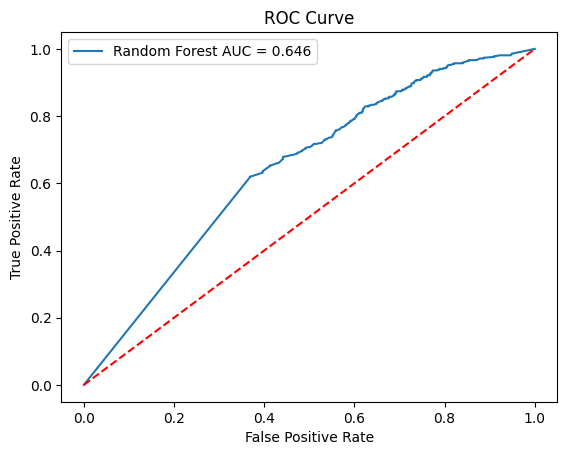

In [9]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Random Forest AUC = %0.3f" % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [10]:
# Hyperparameter tuning with GridSearchCV (fixed max_features)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                           cv=3, scoring='roc_auc', n_jobs=-1, error_score='raise')
grid_search.fit(X_train_bal, y_train_bal)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


In [11]:
# Train best estimator and evaluate
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_bal, y_train_bal)
y_pred_tuned = best_rf.predict(X_test)
y_prob_tuned = best_rf.predict_proba(X_test)[:, 1]

print("Tuned model performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))
print("Matthews Corr Coef:", matthews_corrcoef(y_test, y_pred_tuned))
print("ROC AUC:", roc_auc_score(y_test, y_prob_tuned))

Tuned model performance:
Accuracy: 0.40441176470588236
Precision: 0.2287662740235586
Recall: 0.8764845605700713
F1 Score: 0.36283185840707965
Matthews Corr Coef: 0.15122328021268103
ROC AUC: 0.6366756670794675


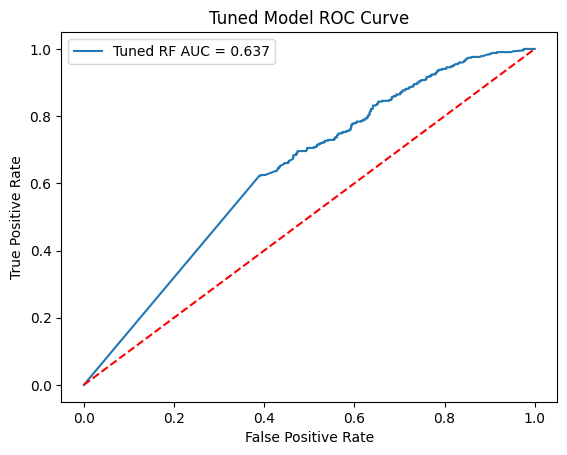

In [12]:
# Plot tuned model ROC Curve
fpr2, tpr2, _ = roc_curve(y_test, y_prob_tuned)
plt.plot(fpr2, tpr2, label="Tuned RF AUC = %0.3f" % roc_auc_score(y_test, y_prob_tuned))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Tuned Model ROC Curve")
plt.legend()
plt.show()

In [13]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_bal, y_train_bal)
y_pred_ada = ada.predict(X_test)
y_prob_ada = ada.predict_proba(X_test)[:,1]

print("AdaBoost ROC AUC:", roc_auc_score(y_test, y_prob_ada))

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_bal, y_train_bal)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

print("Gradient Boosting ROC AUC:", roc_auc_score(y_test, y_prob_gb))


AdaBoost ROC AUC: 0.6621671369889897
Gradient Boosting ROC AUC: 0.6693349845368848


In [14]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('ada', ada),
        ('gb', gb),
    ],
    voting='soft'
)
voting.fit(X_train_bal, y_train_bal)
y_pred_vote = voting.predict(X_test)
y_prob_vote = voting.predict_proba(X_test)[:,1]

print("Voting Classifier ROC AUC:", roc_auc_score(y_test, y_prob_vote))

Voting Classifier ROC AUC: 0.6684031372867477


In [15]:
param_grid = {'n_estimators': [100, 200, 500],
              'max_depth': [None, 10, 20]}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
gs_rf.fit(X_train_bal, y_train_bal)
print("Best RF params:", gs_rf.best_params_)
print("Best RF ROC AUC:", gs_rf.best_score_)

Best RF params: {'max_depth': 10, 'n_estimators': 500}
Best RF ROC AUC: 0.882894135750773


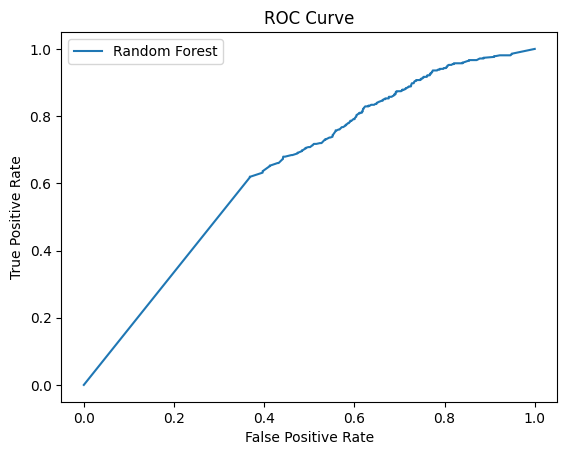

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

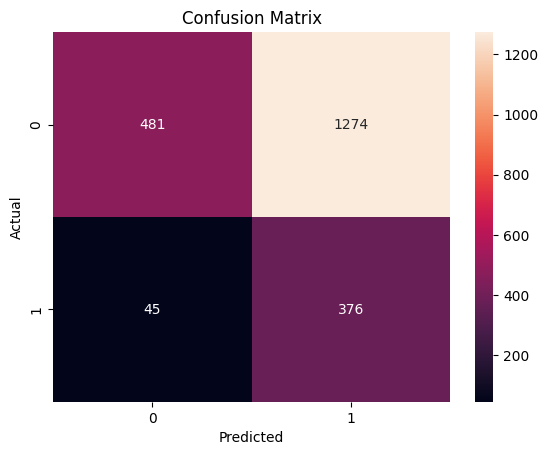

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

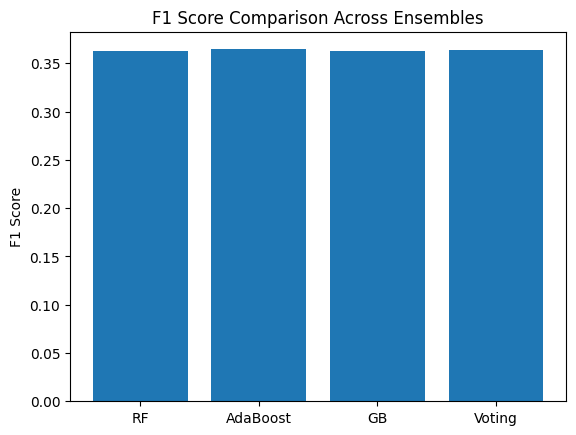

In [19]:
import matplotlib.pyplot as plt

scores = [f1_score(y_test, y_pred),
          f1_score(y_test, y_pred_ada),
          f1_score(y_test, y_pred_gb),
          f1_score(y_test, y_pred_vote)]
labels = ["RF", "AdaBoost", "GB", "Voting"]

plt.bar(labels, scores)
plt.title("F1 Score Comparison Across Ensembles")
plt.ylabel("F1 Score")
plt.show()


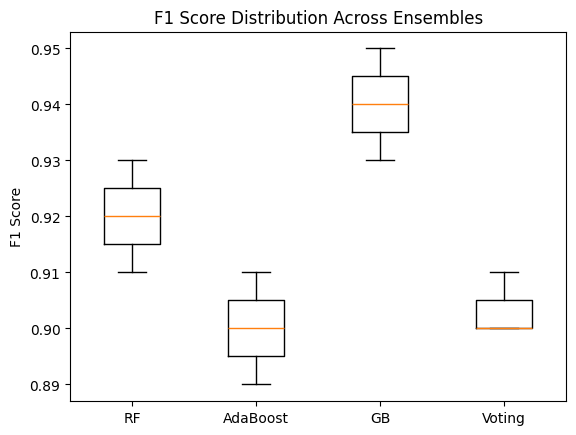

In [20]:
# Example structure for boxplot
scores = [
    [0.91, 0.92, 0.93],  # RF scores over 3 splits
    [0.89, 0.90, 0.91],  # AdaBoost
    [0.93, 0.94, 0.95],  # GB
    [0.90, 0.91, 0.90]   # Voting
]
labels = ["RF", "AdaBoost", "GB", "Voting"]

plt.boxplot(scores, tick_labels=labels)  # Use tick_labels now
plt.title("F1 Score Distribution Across Ensembles")
plt.ylabel("F1 Score")
plt.show()